In [2]:
import pandas as pd

In [3]:
import seaborn as sb

In [4]:
low_memory = False

In [5]:
%matplotlib inline

In [6]:
pd.options.display.max_columns = 10

In [7]:
pd.options.display.max_rows = 20

In [8]:
filename = 'salicap-projetos.csv'

In [9]:
df = pd.read_csv( filename )

In [10]:
df.shape

(100, 32)

In [11]:
df.describe()

,outras_fontes,PRONAC,valor_aprovado,valor_solicitado,valor_projeto,ano_projeto,valor_captado,valor_proposta
count,100.00000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,100.0,100.000000,1.000000e+02
mean,1082.50000,183802.300000,2.075539e+06,2.075710e+06,2.076621e+06,18.0,1795.571600,2.076868e+06
std,9773.00026,30.991201,4.447452e+06,4.447437e+06,4.447353e+06,0.0,12039.585852,4.447311e+06
min,0.00000,183750.000000,0.000000e+00,0.000000e+00,0.000000e+00,18.0,0.000000,0.000000e+00
25%,0.00000,183774.750000,3.501056e+05,3.496794e+05,3.772205e+05,18.0,0.000000,3.772205e+05
50%,0.00000,183802.500000,7.076069e+05,7.076069e+05,7.076069e+05,18.0,0.000000,7.076069e+05
75%,0.00000,183828.250000,1.656028e+06,1.669292e+06,1.656028e+06,18.0,0.000000,1.669292e+06
max,97450.00000,183855.000000,3.141978e+07,3.141978e+07,3.141978e+07,18.0,115000.000000,3.141978e+07


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 32 columns):
etapa                    99 non-null object
providencia              100 non-null object
area                     100 non-null object
enquadramento            100 non-null object
objetivos                99 non-null object
ficha_tecnica            99 non-null object
situacao                 100 non-null object
outras_fontes            100 non-null float64
acessibilidade           99 non-null object
sinopse                  93 non-null object
nome                     100 non-null object
cgccpf                   100 non-null object
mecanismo                100 non-null object
segmento                 100 non-null object
PRONAC                   100 non-null int64
estrategia_execucao      79 non-null object
valor_aprovado           100 non-null float64
justificativa            99 non-null object
resumo                   100 non-null object
valor_solicitado         100 non-null float64
e

In [52]:
df.sample( 5 )

,etapa,providencia,area,enquadramento,objetivos,...,proponente,ano_projeto,data_inicio,valor_captado,valor_proposta
26,Etapas da Produção PRÉ-PRODUÇÃO – 4 meses Capt...,Abertura de conta bancária de livre movimentaç...,Artes Cênicas,Artigo 18,"Objetivos Gerais Contribuir para facilitar, a ...",...,ASSOCIAÇÃO CULTURAL E QJ RETIRANTES DO SERTÃO,18,2018-12-10,0.0,261331.25
81,Etapas de Trabalho produto: 19ª Feira Nacional...,Abertura de conta bancária de livre movimentaç...,Humanidades,Artigo 18,Objetivo Geral: Realizar no período de 08 dias...,...,FUNDAÇÃO DO LIVRO E LEITURA DE RIBEIRÃO PRETO,18,2019-01-01,0.0,1368796.13
36,O projeto será desenvolvido ao longo de 10 mes...,Abertura de conta bancária de livre movimentaç...,Audiovisual,Artigo 18,O atual projeto foi clonado do projeto de 2018...,...,Klaxon Cultura Audiovisual Ltda - ME,18,2019-01-01,0.0,658544.67
5,PRÉ-PRODUÇÃO: Lançamento do Projeto: Evento a ...,Abertura de conta bancária de livre movimentaç...,Artes Cênicas,Artigo 18,OBJETIVO GERAL - Proporcionar gratuitamente a ...,...,Associação Comercial e Empresarial de Toledo -...,18,2018-12-20,0.0,386033.90
59,ETAPAS DE TRABALHO PRÉ-PRODUÇÃO – 3 meses . ...,Abertura de conta bancária de livre movimentaç...,Artes Cênicas,Artigo 18,Objetivos Gerais - Trabalhar o universo infant...,...,Renovarte Produções Culturais LTDA - ME,18,2019-01-01,0.0,692387.50


<h2>Qual é a situação dos projetos atuais no Brasil</h2>

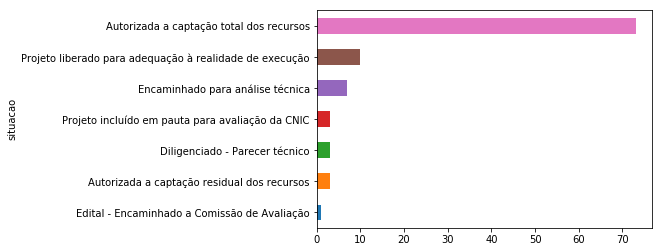

In [16]:
df.groupby( 'situacao' ).size().sort_values().plot.barh()

Muitos deles já estão aprovados para a captação de recursos pelo governo.
<h2>Qual é a quantidade de projetos por estado?</h2>

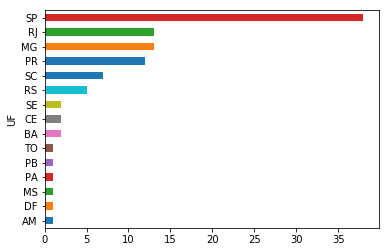

In [68]:
df.groupby( 'UF' ).size().sort_values().plot.barh()

<h2>Alguns projetos com valor aprovado maior que 1000000:</h2>

In [69]:
df.query( 'valor_aprovado > 1000000' )[['nome' , 'valor_aprovado' , 'UF']].head( 10 )

,nome,valor_aprovado,UF
1,24º É Tudo Verdade - Festival Internacional de...,1955871.00,SP
13,Bossa & Roll,1980428.60,SP
20,ENFIM A SORTE CHEGOU,1635177.50,RJ
23,Festival BB Seguros de Blues e Jazz 5a Edição,6509455.48,SP
29,Woodstock Belo Horizonte - Uma viagem imersiva...,1280475.33,RJ
30,MODA AUTORAL BRASILEIRA,1306450.15,SP
32,Djavan – A Rota do Indivíduo,1870812.69,RJ
33,Reforma do Teatro Colégio Santo Antônio,2219564.97,SP
35,"Cinema É Pra Você, sim - Norte",2434461.56,SP
38,PLANO ANUAL CASA FIAT DE CULTURA 2019,17135812.67,MG


In [70]:
df.query( 'valor_aprovado > 1000000' )[['nome' , 'area' , 'UF']].head( 10 )

,nome,area,UF
1,24º É Tudo Verdade - Festival Internacional de...,Audiovisual,SP
13,Bossa & Roll,Artes Cênicas,SP
20,ENFIM A SORTE CHEGOU,Artes Cênicas,RJ
23,Festival BB Seguros de Blues e Jazz 5a Edição,Música,SP
29,Woodstock Belo Horizonte - Uma viagem imersiva...,Artes Visuais,RJ
30,MODA AUTORAL BRASILEIRA,Artes Visuais,SP
32,Djavan – A Rota do Indivíduo,Artes Cênicas,RJ
33,Reforma do Teatro Colégio Santo Antônio,Patrimônio Cultural,SP
35,"Cinema É Pra Você, sim - Norte",Audiovisual,SP
38,PLANO ANUAL CASA FIAT DE CULTURA 2019,Artes Visuais,MG


<h2>Qual a quantidade de projetos aprovados que estão prontos para captar recursos por estado?</h2>

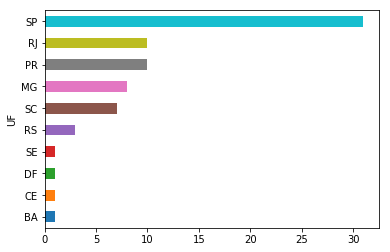

In [71]:
df.query( 'situacao == "Autorizada a captação total dos recursos"' ).groupby( 'UF' ).size().sort_values().plot.barh()

Podemos ver que São Paulo possui vários projetos aprovados.
<h2>Qual é o valor aprovado total dos projetos por estado?</h2>

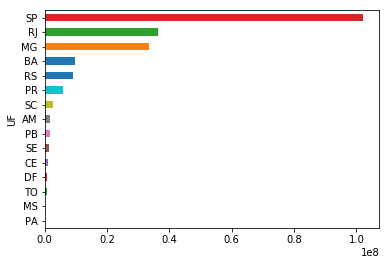

In [72]:
df.groupby( 'UF' )[ 'valor_aprovado' ].sum().sort_values().plot.barh()

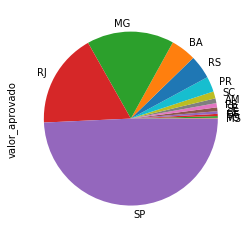

In [73]:
df.groupby( 'UF' )[ 'valor_aprovado' ].sum().sort_values().plot.pie()

<h2>Qual é o tipo de projeto mais comum apresentado à Lei em <i>São Paulo?</i></h2>
Em São Paulo é Artes Cênicas, seguido de Música, Humanidades, etc...

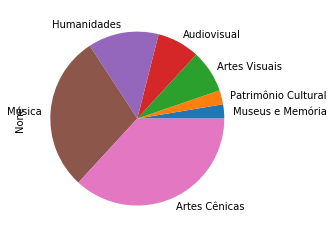

In [78]:
df.query( 'UF == "SP"' ).groupby( 'area' ).size().sort_values().plot.pie()

<h2>Qual o valor aprovado total para cada área em <i>São Paulo</i>?</h2>

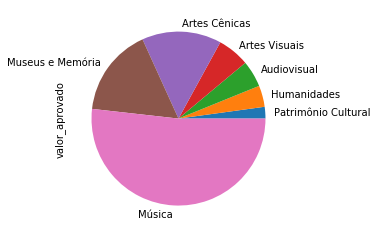

In [79]:
df.query( 'UF == "SP"' ).groupby( 'area' )['valor_aprovado'].sum().sort_values().plot.pie()

<b>Podemos ver que, embora a maioria seja projetos da <i>Artes Cênicas</i>, os gastos são maiores com Música.</b>
<h3>No país, a situação não parece mudar muito.</h3>

In [80]:
df.groupby('area').size().sort_values().to_frame()

,0
area,
Artes Integradas,1
Audiovisual,5
Museus e Memória,5
Patrimônio Cultural,5
Artes Visuais,9
Humanidades,11
Música,27
Artes Cênicas,37


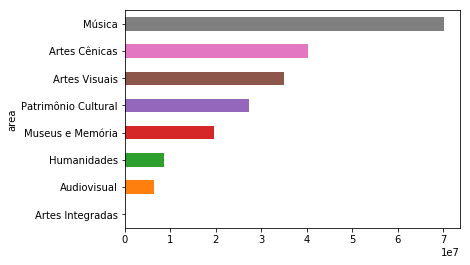

In [81]:
df.groupby( 'area' )['valor_aprovado'].sum().sort_values().plot.barh()

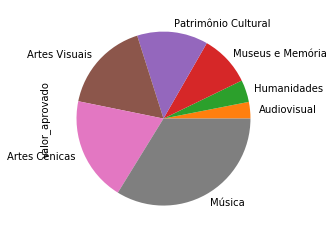

In [83]:
df.groupby( 'area' )['valor_aprovado'].sum().sort_values().plot.pie()